<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-27 15:58:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.3MB/s    in 2.3s    

2025-01-27 15:58:56 (67.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [9]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [11]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

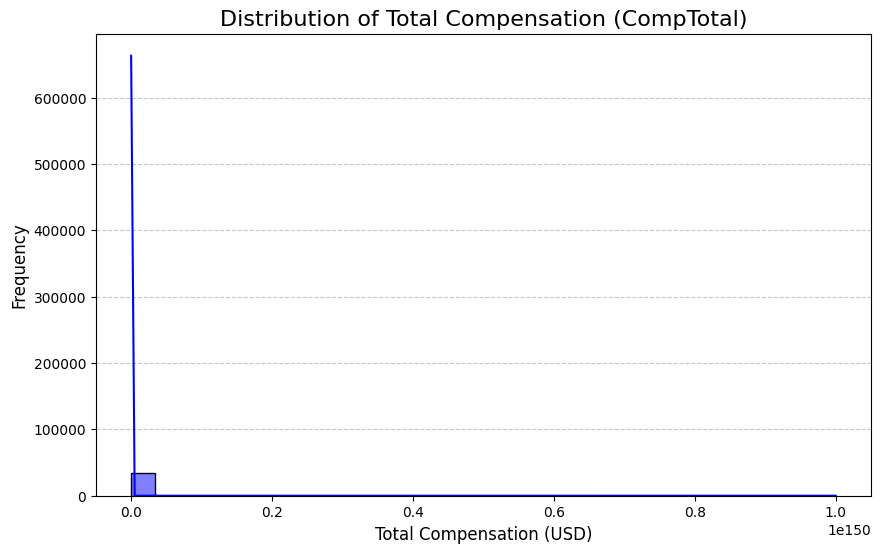

In [16]:
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('Total Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Box Plots**

Plot a box plot of Age.


                      Age
0      Under 18 years old
1         35-44 years old
2         45-54 years old
3         18-24 years old
4         18-24 years old
...                   ...
65432     18-24 years old
65433     25-34 years old
65434     25-34 years old
65435     18-24 years old
65436     18-24 years old

[65437 rows x 1 columns]


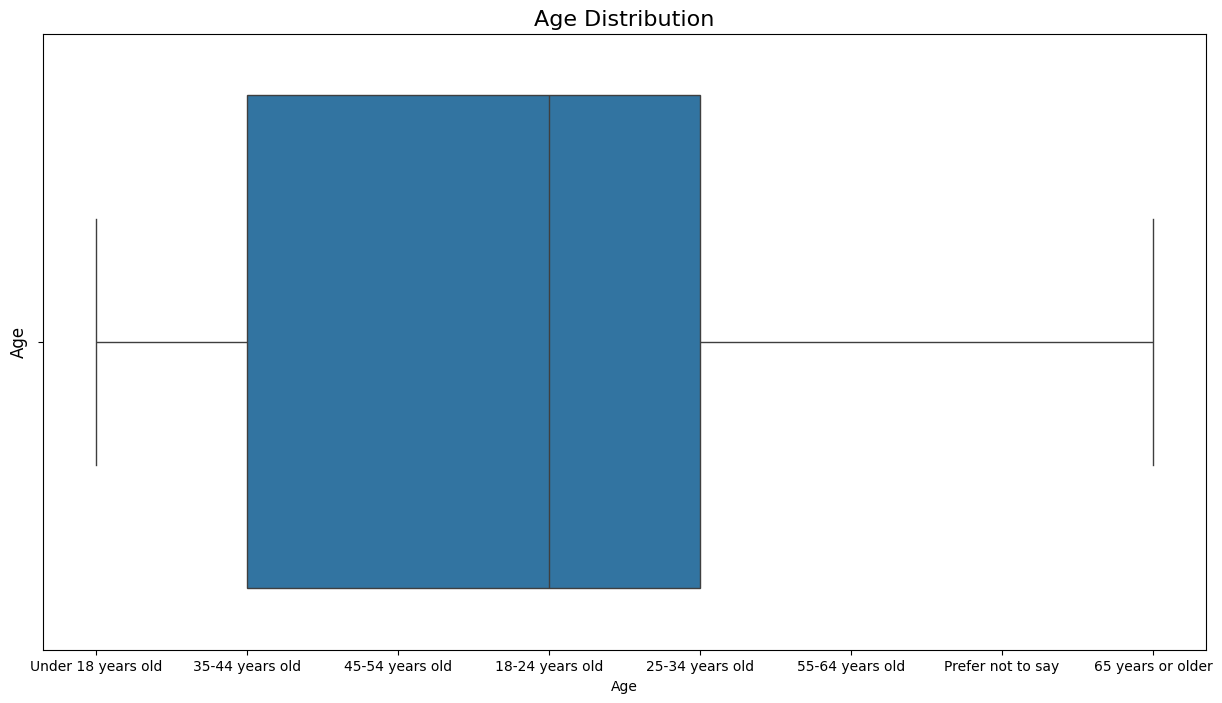

In [33]:
QUERY = """
SELECT Age
FROM main
"""

df = pd.read_sql_query(QUERY, conn)
print(df)

plt.figure(figsize=(15, 8))
sns.boxplot(x=df['Age'].dropna())
plt.title('Age Distribution', fontsize=16)
plt.ylabel('Age', fontsize=12)
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


                      Age  WorkExp
0      Under 18 years old      NaN
1         35-44 years old     17.0
2         45-54 years old      NaN
3         18-24 years old      NaN
4         18-24 years old      NaN
...                   ...      ...
65432     18-24 years old      NaN
65433     25-34 years old      NaN
65434     25-34 years old      NaN
65435     18-24 years old      5.0
65436     18-24 years old      NaN

[65437 rows x 2 columns]


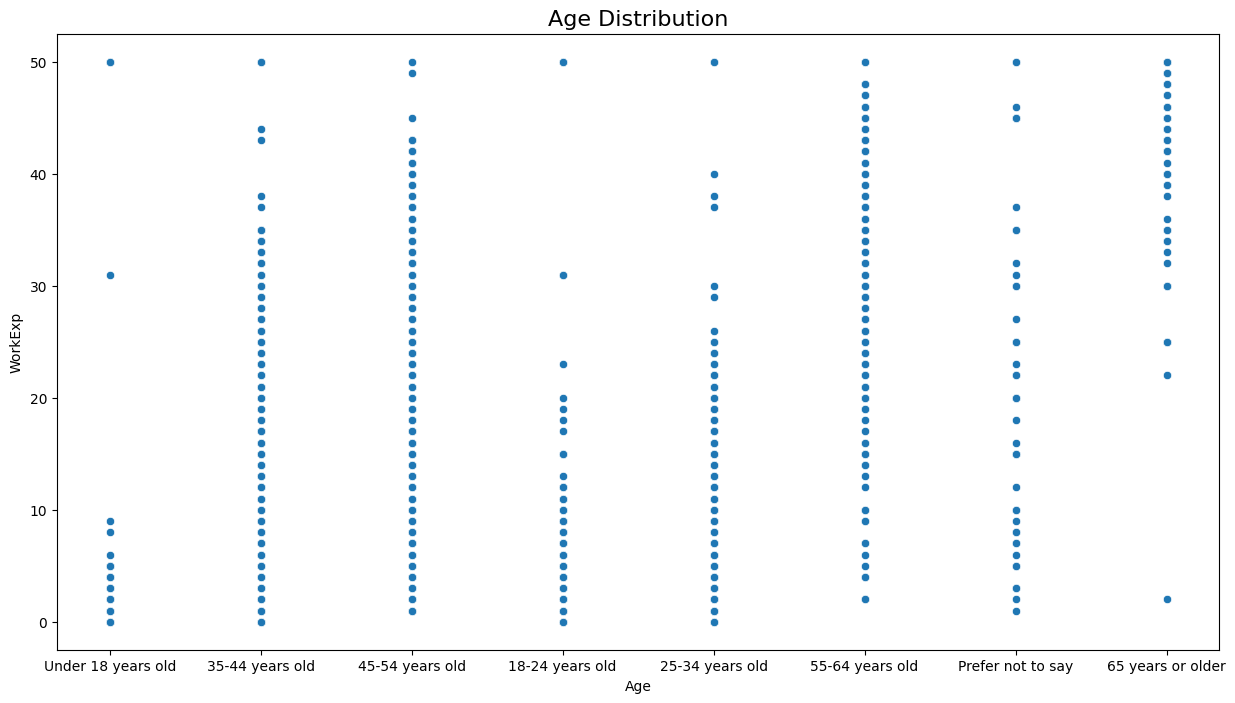

In [28]:
QUERY = """
SELECT Age, WorkExp
FROM main
"""

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)
print(df)

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Age', y='WorkExp')
plt.title('Age Distribution', fontsize=16)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


      TimeSearching Frustration                 Age
0              None        None  Under 18 years old
1              None        None     35-44 years old
2              None        None     45-54 years old
3              None        None     18-24 years old
4              None        None     18-24 years old
...             ...         ...                 ...
65432          None        None     18-24 years old
65433          None        None     25-34 years old
65434          None        None     25-34 years old
65435          None        None     18-24 years old
65436          None        None     18-24 years old

[65437 rows x 3 columns]


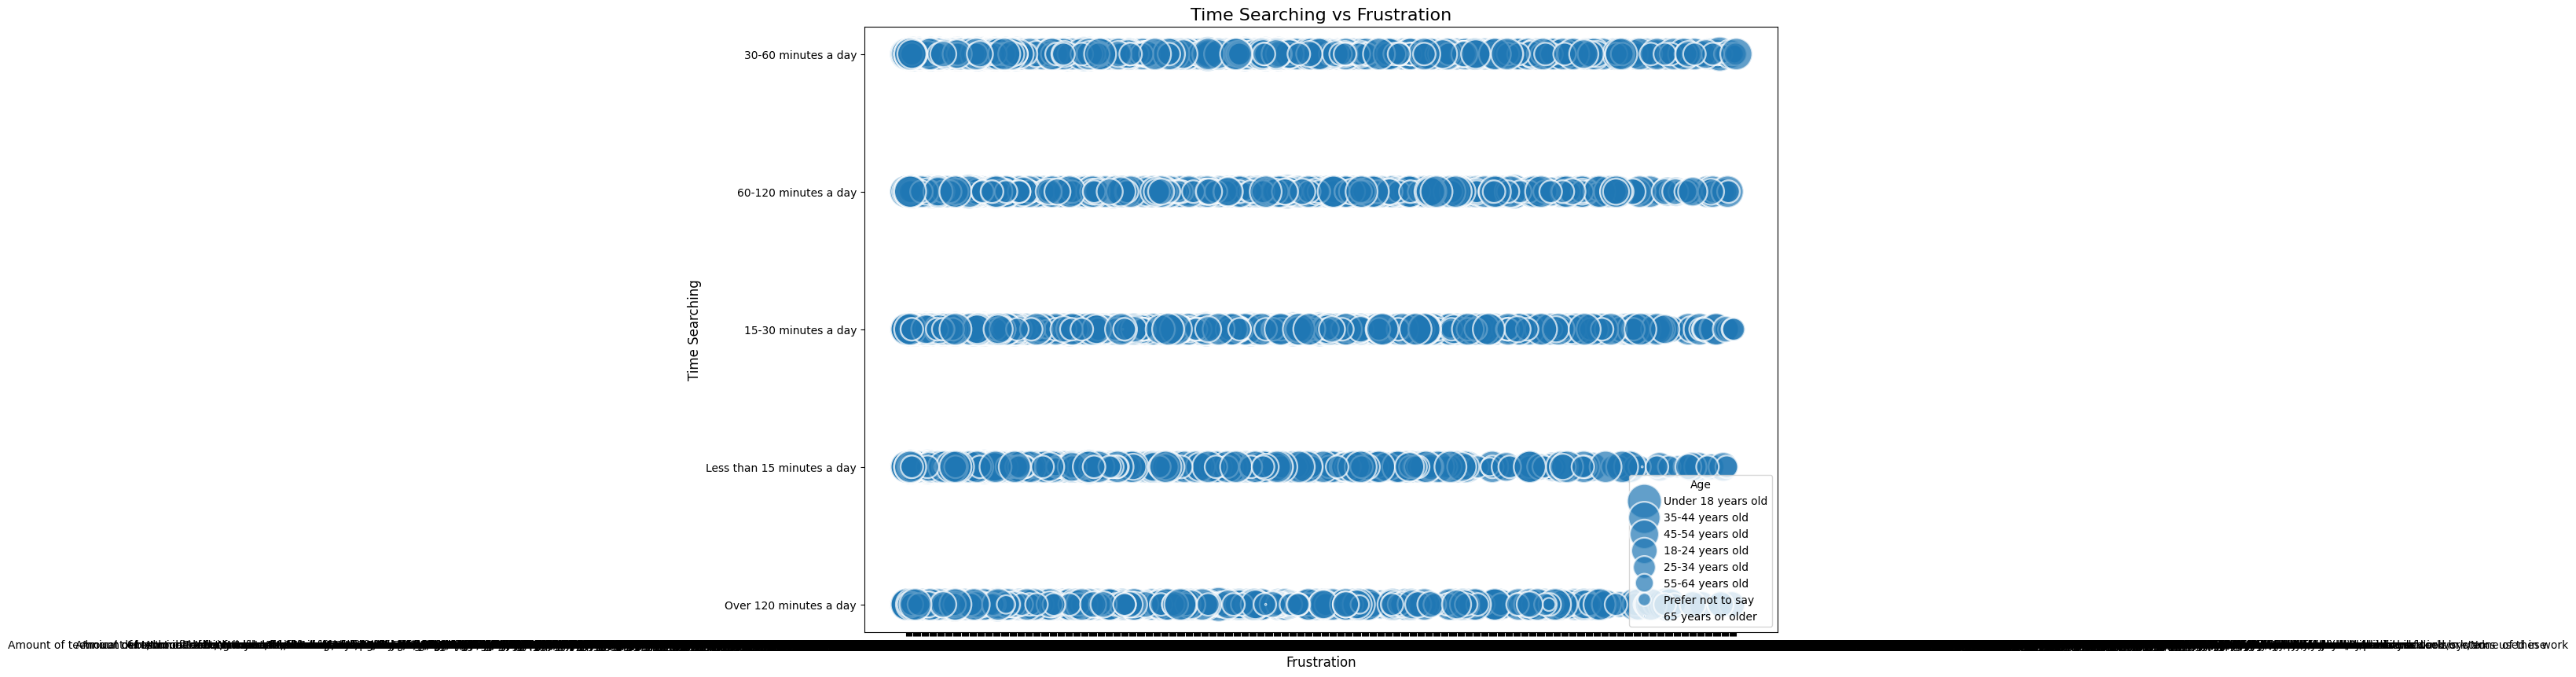

In [63]:
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
"""

df = pd.read_sql_query(QUERY, conn)
print(df)

plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df,
    x='Frustration',
    y='TimeSearching',
    size='Age',
    sizes=(1, 1000), 
    alpha=0.7
)
plt.title('Time Searching vs Frustration', fontsize=16)
plt.xlabel('Frustration', size=12)
plt.ylabel('Time Searching', size=12)
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


           DatabaseWantToWorkWith
0                            None
1                      PostgreSQL
2      Firebase Realtime Database
3        MongoDB;MySQL;PostgreSQL
4               PostgreSQL;SQLite
...                           ...
65432                        None
65433                        None
65434                        None
65435           PostgreSQL;SQLite
65436    MongoDB;MySQL;PostgreSQL

[65437 rows x 1 columns]


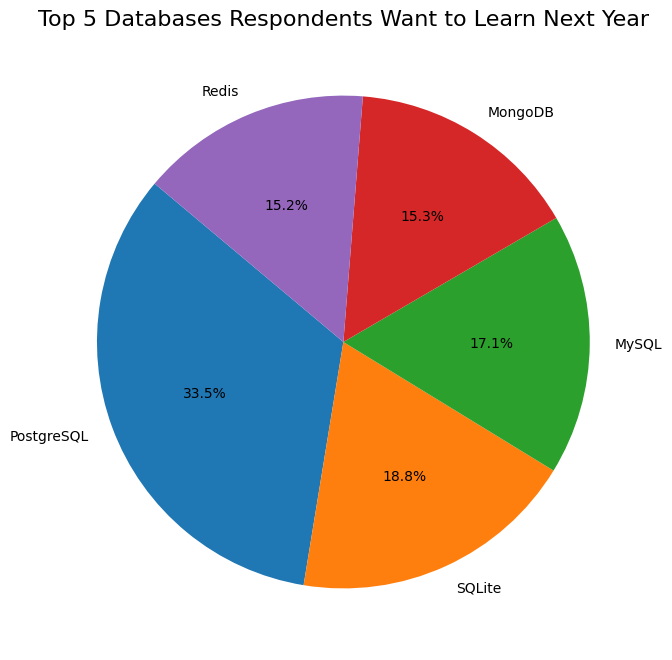

In [71]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""

df = pd.read_sql_query(QUERY, conn)
print(df)

df = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

database_counts = df.value_counts()

top_5 = database_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=16)
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


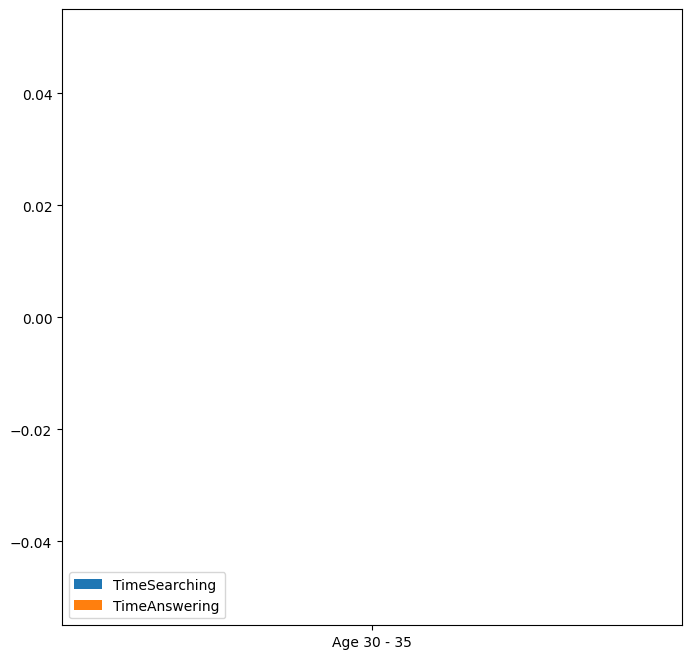

In [96]:
QUERY = """
SELECT TimeSearching, TimeAnswering, Age
FROM main
WHERE Age BETWEEN 30 AND 35

"""
df = pd.read_sql_query(QUERY,conn)

time_search = df['TimeSearching'].quantile(0.5)
time_answer = df['TimeAnswering'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', time_search, label='TimeSearching')
ax.bar('Age 30 - 35', time_answer, bottom=time_search, label='TimeAnswering')
ax.legend()

plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


      CompTotal              Age
0           NaN  45-54 years old
1           NaN  45-54 years old
2           NaN  45-54 years old
3           NaN  45-54 years old
4           NaN  45-54 years old
...         ...              ...
8819        NaN  45-54 years old
8820        NaN  45-54 years old
8821        NaN  55-64 years old
8822        NaN  45-54 years old
8823    55000.0  45-54 years old

[8824 rows x 2 columns]


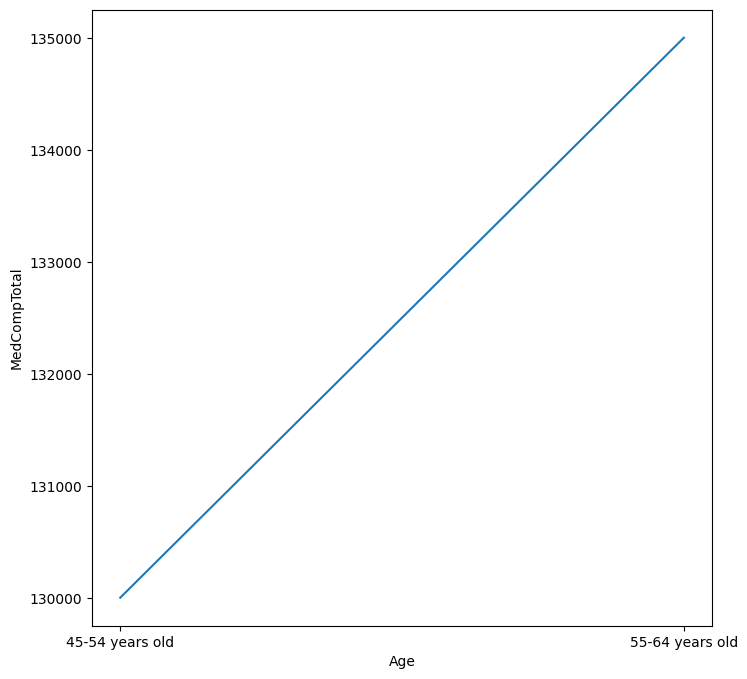

In [97]:
QUERY = """
SELECT CompTotal, Age
FROM main
WHERE Age BETWEEN 45 AND 60

"""
df = pd.read_sql_query(QUERY,conn)
print(df)

medians = df.groupby('Age')['CompTotal'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedCompTotal'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedCompTotal')

plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


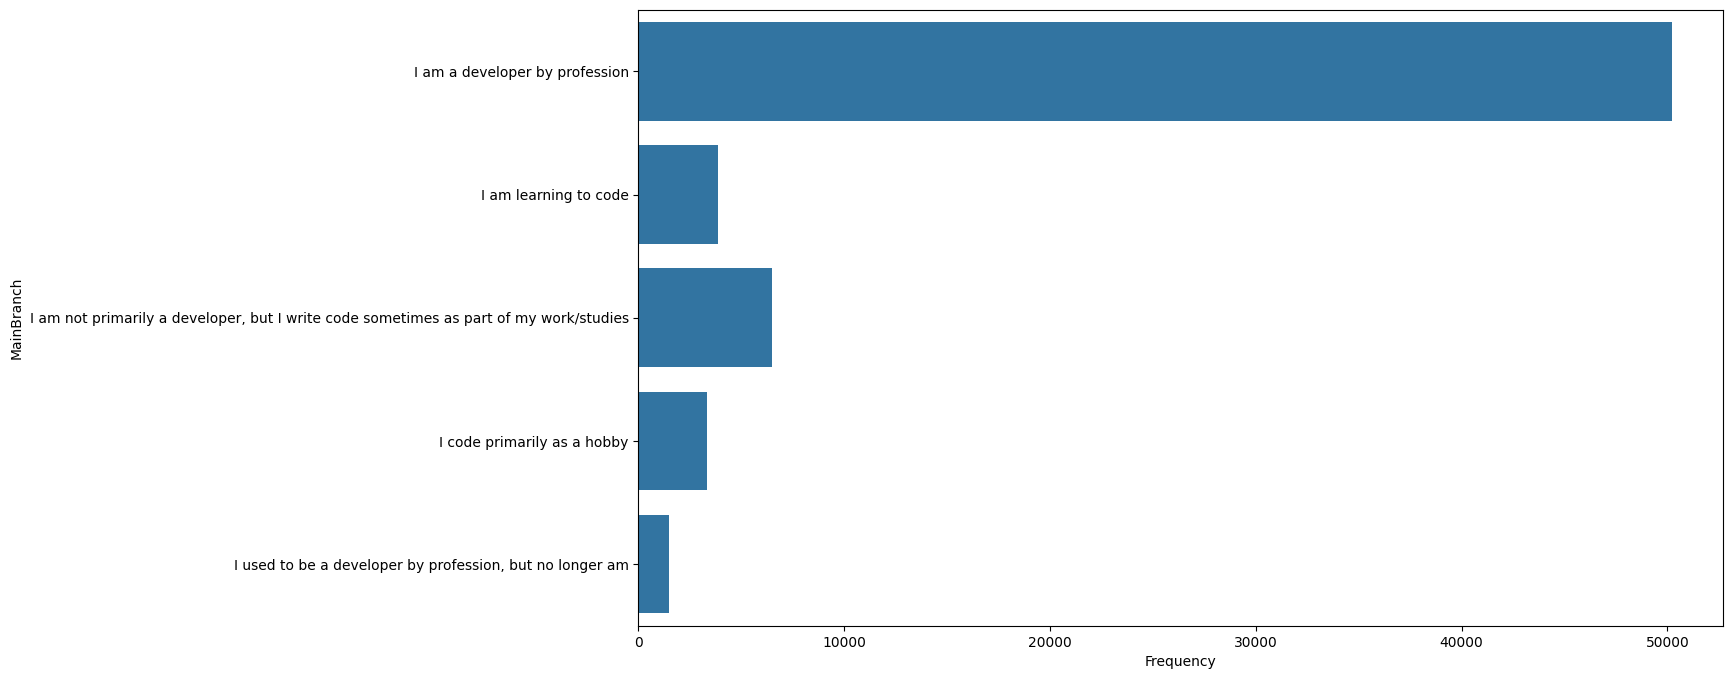

In [98]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM main
GROUP BY MainBranch

"""
df = pd.read_sql_query(QUERY,conn)

plt.rcParams['figure.figsize'] = [14, 8]

sns.barplot(data = df, y = 'MainBranch', x = 'Frequency', orient = 'h')

plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
